## This script contains the following points:

## 1. Visulizations for order timing.

### (1) Create bar graph for orders per day of week.

### (2) Create a bar graph for orders per hour.

### (3) Create a small subset of data to use for line graph visualization.

### (4) Create group order hour by prices.

### (5) Create pie chart with counts of price_range_loc.

### (6) Create bar chart for orders per department.

### (7) Create pie chart for loyalty flag.

### (8) Create bar graph for average order prices per loyalty flag.

### (9) Create stacked line chart for loyalty flag orders per day of week.

### (10) Create stacked line chart for orders per hour for each loyalty flag.

## 2. Visualization for Region.

### (1) Create bar chart for average order price per region.

### (2) Create stacked line chart for order number per day per region.

### (3) Create stacked line chart for order number per hour for each region.

### (4) Create bar chart for order number per age.

### (5) Create bar chart order number per number of dependants.

### (6) Create pie chart for number of dependants.

### (7) Create stacked line chart for order per department for number of dependants.

### (8) Create scatter plot for average order expense per age.

### (9) Create scatter plot for average prices per income.

### (10) Create stacked line chart for order number by department for gender.

# 01. Importing libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings

In [2]:
warnings.filterwarnings('ignore')

# 02. Importing data

In [3]:
path = r'C:\Users\Priya\27-02-2024 Instacart Basket Analysis'

In [4]:
path

'C:\\Users\\Priya\\27-02-2024 Instacart Basket Analysis'

In [5]:
# Import ords_prods_all dataframe
df_ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [6]:
# List table columns
df_ords_prods_all.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average spent', 'spending flag', 'regularity', 'order frequency flag',
       'Gender', 'State', 'Age', 'Number_of_Dependants', 'Familial_Status',
       'income', '_merge', 'Region', 'low_spender', 'shopping_behavior',
       'lifestyle'],
      dtype='object')

## 1. Visulizations for order timing.

### (1) Create bar graph for orders per day of week.

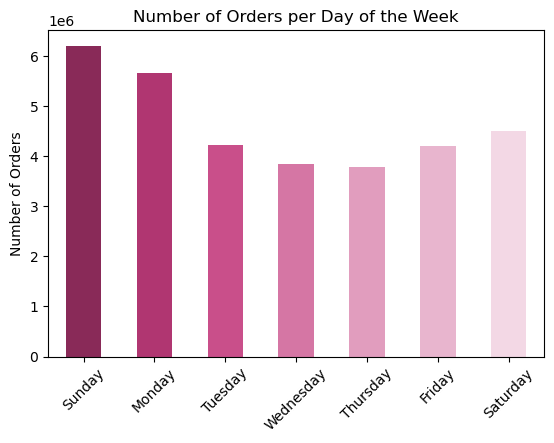

In [7]:
# Create bar graph with sorted x axis and assigned colors
order_day_bar = df_ords_prods_all['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['#892a58','#b03671','#c94f8a','#d576a4','#e19dbe','#e8b5ce','#f3d8e5'])
# Adjust plot size
plt.subplots_adjust(bottom = 0.2)
# Set the axis labels and title
order_day_bar.set_xlabel('')
order_day_bar.set_ylabel('Number of Orders')
order_day_bar.set_title('Number of Orders per Day of the Week')
# Set the x axis ticks
days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
# Add x tick labels, position adjusted
order_day_bar.set_xticklabels(days, rotation = 45)
# Save Bar Graph
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_day_bar.png'))
# Display the plot
plt.show()

### (2) Create a bar graph for orders per hour.

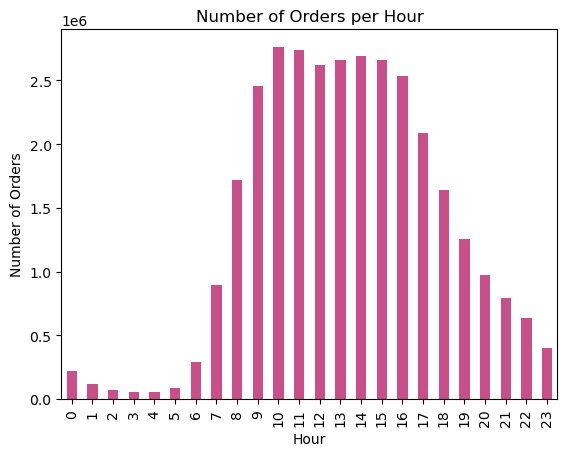

In [8]:
# Create bar graph with sorted x axis and assigned colors
order_hour_bar = df_ords_prods_all['order_hour_of_day'].value_counts().sort_index().plot.bar(color = '#c94f8a')
# Set the axis labels and title
order_hour_bar.set_xlabel('Hour')
order_hour_bar.set_ylabel('Number of Orders')
order_hour_bar.set_title('Number of Orders per Hour')
# Save Bar Graph
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_hour_bar.png'))
# Display the plot
plt.show()

### (3) Create a small subset of data to use for line graph visualization.

In [9]:
# Create random list
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_all)) <= 0.7
# Create small and big tables
big = df_ords_prods_all[dev]
small = df_ords_prods_all[~dev]

In [10]:
small.shape

(9721098, 35)

In [11]:
df_ords_prods_all.shape

(32404859, 35)

### (4) Create group order hour by prices.

In [12]:
hour_price_full_agg = df_ords_prods_all.groupby('order_hour_of_day')['prices'].sum().reset_index()

In [13]:
# View table
hour_price_full_agg

,order_hour_of_day,prices
0,0,1708684.33
1,1,903012.83
2,2,541001.15
3,3,401358.97
4,4,417288.40
5,5,688482.23
6,6,2270795.77
7,7,6967455.09
8,8,13383831.65
9,9,19026993.59


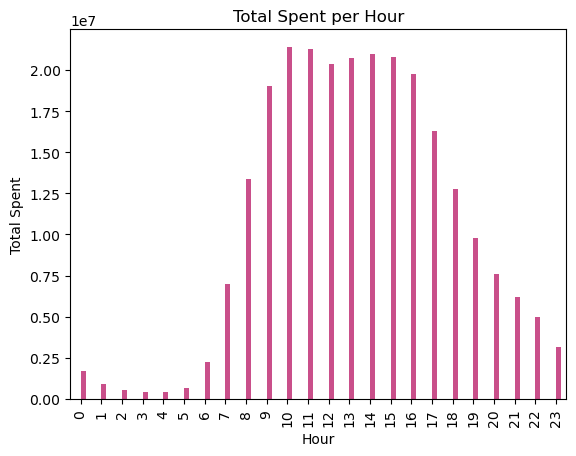

In [14]:
# Plot prices vs hour
hour_price_bar = hour_price_full_agg.plot.bar(color = '#c94f8a')
# Set axis labels and title
hour_price_bar.set_xlabel('Hour')
hour_price_bar.set_ylabel('Total Spent')
hour_price_bar.set_title('Total Spent per Hour')
# Remove legend
hour_price_bar.legend().set_visible(False)
# Save Bar Graph
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hour_price_bar.png'))

### (5) Create pie chart with counts of price_range_loc.

In [15]:
# Create table with counts of price_range_loc
df_ords_prods_all['price_range_loc'].value_counts()

price_range_loc
Mid-range product     21861558
Low-range product     10130750
High-range product      412551
Name: count, dtype: int64

In [16]:
# Create table of price range counts to use for pie chart
price_range_counts = df_ords_prods_all['price_range_loc'].value_counts()

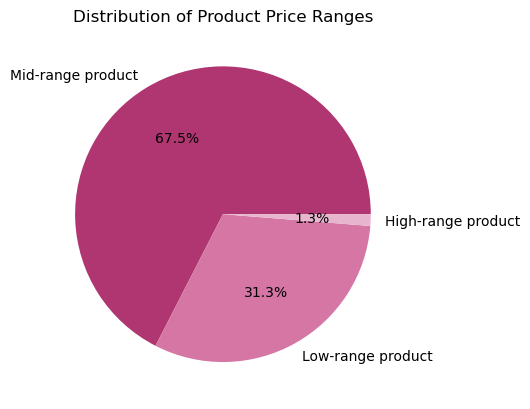

In [17]:
# Create pie chart with labels, percentages, and colors
price_range_pie = plt.pie(price_range_counts, labels = price_range_counts.index, autopct = '%1.1f%%', colors = ['#b03671', '#d576a4','#e8b5ce'])
# Add title
plt.title('Distribution of Product Price Ranges')
# Save Pie Chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_range_pie.png'))

### (6) Create bar chart for orders per department.

In [18]:
# View counts for department_id
df_ords_prods_all['department_id'].value_counts()

department_id
4     9479291
16    5398747
19    2887550
7     2688123
1     2234743
13    1875369
3     1172428
15    1068058
20    1051249
9      866627
17     738666
12     708927
14     703033
11     447572
18     423802
6      269253
5      153696
8       97716
21      69145
2       36291
10      34573
Name: count, dtype: int64

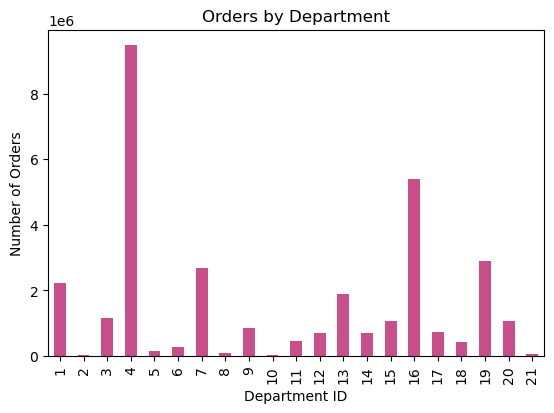

In [19]:
# Create bar chart for orders per department
dep_ord_bar = df_ords_prods_all['department_id'].value_counts().sort_index().plot.bar(color = '#c94f8a')
# Adjust plot size
plt.subplots_adjust(bottom = 0.2)
# Set axis labels and title
dep_ord_bar.set_xlabel('Department ID')
dep_ord_bar.set_ylabel('Number of Orders')
dep_ord_bar.set_title('Orders by Department')
# Save Bar Graph
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dep_order_bar.png'))

### (7) Create pie chart for loyalty flag.

In [20]:
# Create table with loyalty flag counts
loyal_counts = df_ords_prods_all['loyalty_flag'].value_counts()

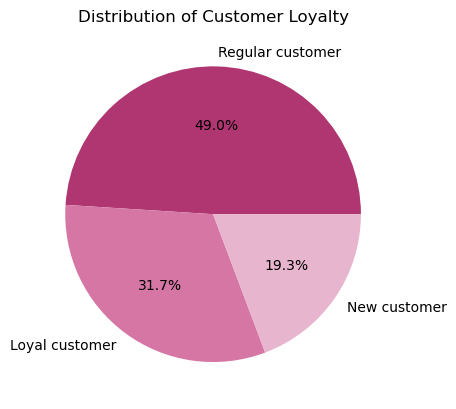

In [21]:
# Create pie chart for loyalty flag
loyal_counts_pie = plt.pie(loyal_counts, labels = loyal_counts.index, autopct = '%1.1f%%', colors = ['#b03671', '#d576a4','#e8b5ce'])
# Create title
plt.title('Distribution of Customer Loyalty')
# Save Pie Chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyal_pie.png'))

### (8) Create bar graph for average order prices per loyalty flag.

In [22]:
# View counts for frequency flag
df_ords_prods_all['order frequency flag'].value_counts()

order frequency flag
Frequent customer        21559853
Regular customer          7208564
Non-frequent customer     3636437
nan                             5
Name: count, dtype: int64

In [23]:
# View counts gor loyalty flag
df_ords_prods_all['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

In [24]:
# Create table with price per order
loyalty_ord_prices = df_ords_prods_all.groupby(['loyalty_flag', 'user_id', 'order_id'])['prices'].sum().reset_index()

In [25]:
loyalty_ord_prices

,loyalty_flag,user_id,order_id,prices
0,Loyal customer,27,7099,96.3
1,Loyal customer,27,65724,17.6
2,Loyal customer,27,129025,9.3
3,Loyal customer,27,225381,45.3
4,Loyal customer,27,230851,57.0
...,...,...,...,...
3214680,Regular customer,206209,2307371,33.1
3214681,Regular customer,206209,2558525,26.2
3214682,Regular customer,206209,2977660,61.2
3214683,Regular customer,206209,3154581,92.6


In [26]:
# Create table with average price per user id
loyalty_cust_prices = loyalty_ord_prices.groupby(['loyalty_flag', 'user_id'])['prices'].mean().reset_index()

In [27]:
loyalty_cust_prices

,loyalty_flag,user_id,prices
0,Loyal customer,27,72.432099
1,Loyal customer,50,53.407463
2,Loyal customer,54,69.085714
3,Loyal customer,90,49.409859
4,Loyal customer,140,108.610526
...,...,...,...
206204,Regular customer,206200,101.465217
206205,Regular customer,206201,100.987500
206206,Regular customer,206202,73.404545
206207,Regular customer,206207,101.931250


In [28]:
# Create table with average price per loyalty flag
loyalty_avg_prices = loyalty_cust_prices.groupby('loyalty_flag')['prices'].mean().reset_index()

In [29]:
loyalty_avg_prices

,loyalty_flag,prices
0,Loyal customer,79.435471
1,New customer,76.029836
2,Regular customer,79.292271


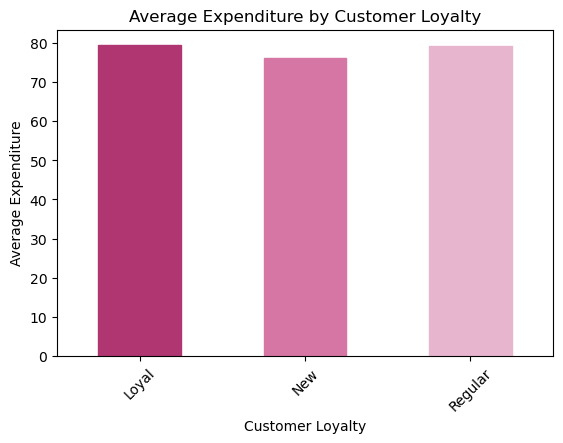

In [30]:
# Create bar plot for average order price per loyalty flag
loyalty_price_bar = loyalty_avg_prices.sort_index().plot.bar()
# Set axis labels and title
loyalty_price_bar.set_xlabel('Customer Loyalty')
loyalty_price_bar.set_ylabel('Average Expenditure')
loyalty_price_bar.set_title('Average Expenditure by Customer Loyalty')
# Set the x axis ticks
loyalty = ['Loyal', 'New', 'Regular']
loyalty_price_bar.set_xticklabels(loyalty, rotation = 45)
# Adjust plot size
plt.subplots_adjust(bottom = 0.2)
# Remove legend
loyalty_price_bar.legend().set_visible(False)
# Add colors
colors = ['#b03671', '#d576a4','#e8b5ce'] 
for bar, color in zip(loyalty_price_bar.containers[0], colors): bar.set_color(color)
# Save Bar Graph
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_price_bar.png'))

### (9) Create stacked line chart for loyalty flag orders per day of week.

In [31]:
# Create table for loyalty flag order counts per day of week
loyalty_day_group = df_ords_prods_all.groupby(['orders_day_of_week', 'loyalty_flag']).size().unstack()

In [32]:
# View table
loyalty_day_group

loyalty_flag,Loyal customer,New customer,Regular customer
orders_day_of_week,,,
0,1754731,1280451,3169000
1,1843401,1067446,2749383
2,1352343,814412,2047075
3,1266495,731417,1842622
4,1292042,694739,1797021
5,1456715,759780,1989296
6,1318366,895745,2282379


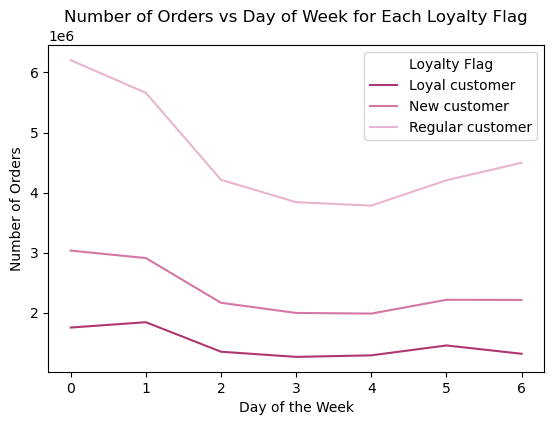

In [33]:
# Create stacked line chart for loyalty flag orders per day of week
loyalty_day_group.plot(kind = 'line', stacked = True, color = ['#b03671', '#d576a4','#e8b5ce'])
# Adjust plot size
plt.subplots_adjust(bottom = 0.2)
# Change x tick to weekday names
day_names = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wendnesday', 4: 'Thursaday', 5: 'Friday', 6: 'Saturday'}
loyalty_day_group = loyalty_day_group.rename(index = day_names)
# Set axis labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.title("Number of Orders vs Day of Week for Each Loyalty Flag")
# Set legend title
plt.legend(title = 'Loyalty Flag')
# Save Stacked Line Chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_day_group.png'))

### (10) Create stacked line chart for orders per hour for each loyalty flag.

In [34]:
# Create table for loyalty flag order counts per hour of day
loyalty_hour_group = df_ords_prods_all.groupby(['order_hour_of_day','loyalty_flag']).size().unstack()

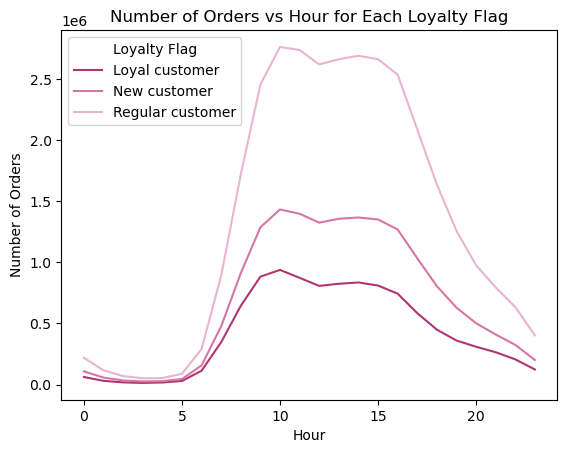

In [35]:
# Create stacked line chart for orders per hour for each loyalty flag
loyalty_hour_group.plot(kind = 'line', stacked = True, color = ['#b03671', '#d576a4','#e8b5ce'])
# set axis labels and title
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.title('Number of Orders vs Hour for Each Loyalty Flag')
# Set title legend
plt.legend(title= 'Loyalty Flag')
# Save Stacked Line Chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_hour_group.png'))

## 2. Visualization for Region.

### (1) Create bar chart for average order price per region.

In [36]:
# Create table of average order prices by region
region_ord_prices = df_ords_prods_all.groupby(['Region', 'user_id', 'order_id'])['prices'].sum().reset_index()
region_cust_prices = region_ord_prices.groupby(['Region', 'user_id'])['prices'].mean().reset_index()
region_avg_prices = region_cust_prices.groupby('Region')['prices'].mean().reset_index()

In [37]:
# View table
region_avg_prices

,Region,prices
0,Midwest,77.782578
1,Northeast,77.369460
2,South,77.482377
3,West,77.458288


In [38]:
region_avg_prices.set_index('Region', inplace = True)

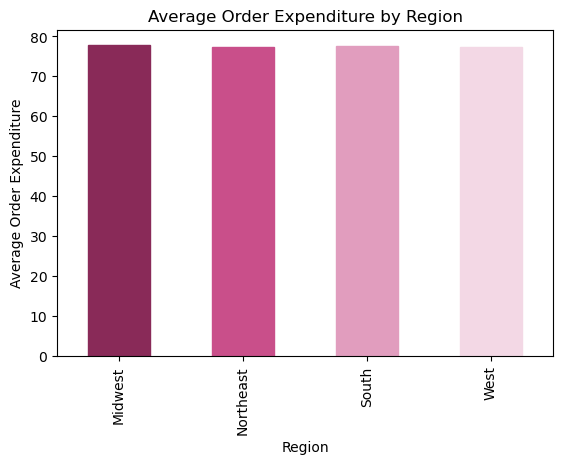

In [39]:
# Create bar chart for average order price per region
reg_prices_bar = region_avg_prices.sort_index().plot.bar()
# Adjust plot size
plt.subplots_adjust(bottom = 0.2)
# Set axis labels and title
reg_prices_bar.set_xlabel('Region')
reg_prices_bar.set_ylabel('Average Order Expenditure')
reg_prices_bar.set_title('Average Order Expenditure by Region')
# Set title legend
reg_prices_bar.legend().set_visible(False)
# Add colors
colors = ['#892a58','#c94f8a', '#e19dbe','#f3d8e5']
for bar, color in zip(reg_prices_bar.containers[0], colors): bar.set_color(color)
# Save Bar Graph
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'reg_prices_bar.png'))

### (2) Create stacked line chart for order number per day per region.

In [40]:
# Create table for per day order number by per region
region_day_group = df_ords_prods_all.groupby(['orders_day_of_week', 'Region']).size().unstack()

In [41]:
# View table
region_day_group

Region,Midwest,Northeast,South,West
orders_day_of_week,,,,
0,1460186,1097258,2052776,1593962
1,1320759,999953,1892057,1447461
2,991770,746153,1404662,1071245
3,895093,679308,1287335,978798
4,888131,666326,1258537,970808
5,983262,746455,1399737,1076337
6,1058124,787283,1496781,1154302


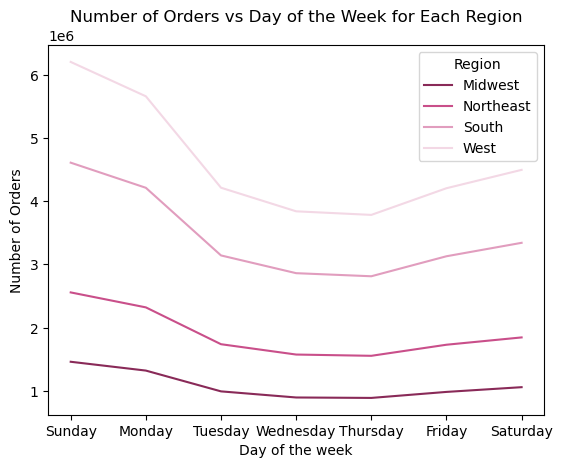

In [42]:
# Create stacked line chart for order number per day per region
day_names = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
region_day_group = region_day_group.rename(index = day_names)
region_day_group.plot(kind = 'line', stacked = True, color = ['#892a58','#c94f8a', '#e19dbe','#f3d8e5'])
# Set axis labels and title
plt.xlabel('Day of the week')
plt.ylabel('Number of Orders')
plt.title('Number of Orders vs Day of the Week for Each Region')
# Set title legend
plt.legend(title = 'Region')
# Save Stacked Line Chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'reg_day_group.png'))

### (3) Create stacked line chart for order number per hour for each region.

In [43]:
# Create table for order number per hour for each region
region_hour_group = df_ords_prods_all.groupby(['order_hour_of_day', 'Region']).size().unstack()

In [44]:
# View table
region_hour_group

Region,Midwest,Northeast,South,West
order_hour_of_day,,,,
0,50748,38557,73297,56167
1,27360,21543,37906,28891
2,16987,12436,21980,17972
3,11909,9218,17437,12717
4,12690,9507,17966,13079
5,19858,15395,30838,21870
6,67296,50545,98696,73956
7,208272,158950,297744,226088
8,398142,305344,579045,435587


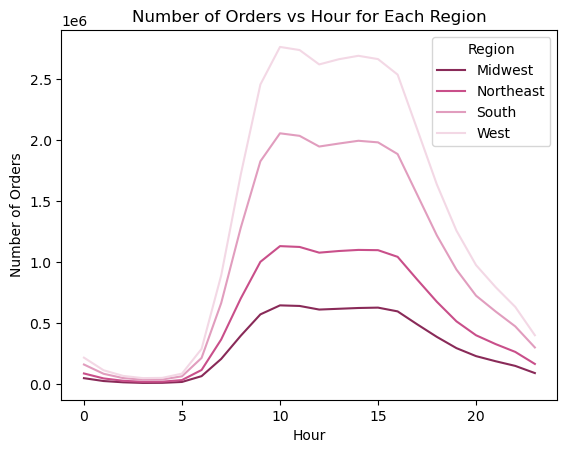

In [45]:
# Create stacked line chart for order number per hour for each region
region_hour_group.plot(kind = 'line', stacked = True, color = ['#892a58','#c94f8a', '#e19dbe','#f3d8e5'])
# Set axis labels and title
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.title('Number of Orders vs Hour for Each Region')
# Set title legend
plt.legend(title = 'Region')
# Save Stacked Line Chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'reg_hour_group.png'))

### (4) Create bar chart for order number per age.

In [46]:
# Create table for order number per age
df_ords_prods_all['Age'].value_counts()

Age
49    531360
79    529742
48    529728
31    528551
64    528009
       ...  
60    484416
36    483812
66    476219
41    475225
25    472188
Name: count, Length: 64, dtype: int64

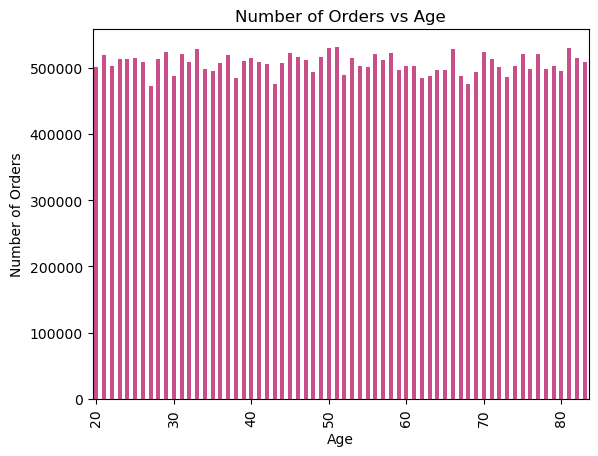

In [47]:
# Create bar chart for order number per age
age_orders_bar = df_ords_prods_all['Age'].value_counts().sort_index().plot.bar(color = '#c94f8a')
# Set custom x-ticks
display_ages = [20, 30, 40, 50, 60, 70, 80]
plt.xticks(ticks=[i-20 for i in display_ages], labels = display_ages)
# Set axis labels and title
plt.xlabel('Age')
plt.ylabel('Number of Orders')
plt.title('Number of Orders vs Age')
# Save Bar Chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_orders.png'))

### (5) Create bar chart order number per number of dependants.

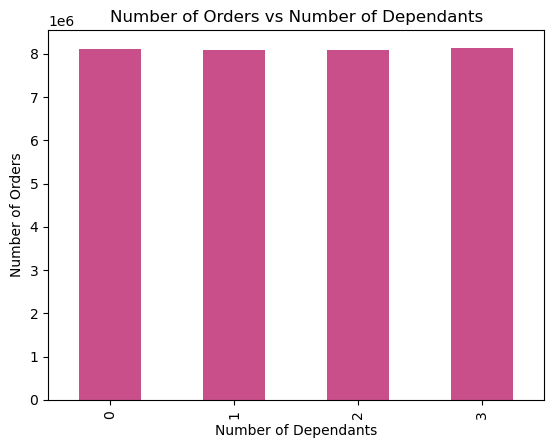

In [48]:
dep_orders_bar = df_ords_prods_all['Number_of_Dependants'].value_counts().sort_index().plot.bar(color = '#c94f8a')
# Set axis labels and title
plt.xlabel('Number of Dependants')
plt.ylabel('Number of Orders')
plt.title('Number of Orders vs Number of Dependants')
# Save Bar Chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'ord_dep_group.png'))

### (6) Create pie chart for number of dependants.

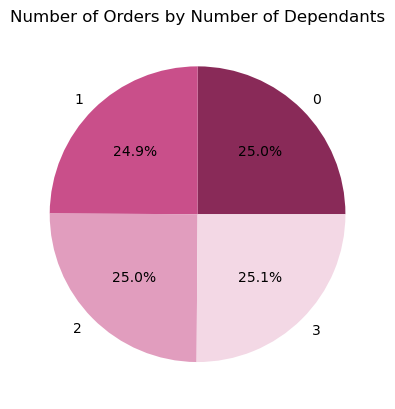

In [49]:
dep_counts = df_ords_prods_all['Number_of_Dependants'].value_counts().sort_index()
plt.pie(dep_counts, labels = dep_counts.index, autopct = '%1.1f%%', colors = ['#892a58','#c94f8a', '#e19dbe','#f3d8e5'])
# Set title
plt.title('Number of Orders by Number of Dependants')
# Save Pie Chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dep_counts.png'))

### (7) Create stacked line chart for order per department for number of dependants.

In [50]:
# Create table for order per department for number of dependants
dep_dep_group = df_ords_prods_all.groupby(['department_id', 'Number_of_Dependants']).size().unstack()

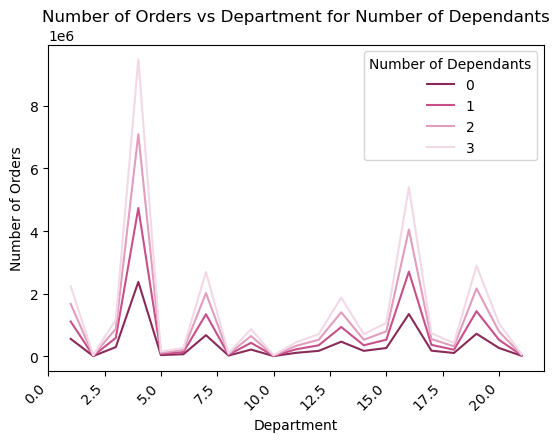

In [51]:
# Create stacked line chart for order per department for number of dependants
dep_dep_group.plot(kind = 'line', stacked = True, color = ['#892a58','#c94f8a', '#e19dbe','#f3d8e5'])
# Adjust plot size
plt.subplots_adjust(bottom = 0.2)
# Set axis labels and title
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.title('Number of Orders vs Department for Number of Dependants')
# Add x tick labels, position adjusted
plt.xticks(rotation = 45, ha = 'right')
# Set title legend
plt.legend(title = 'Number of Dependants')
# Save Stacked Line Chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dep_dep_group.png'))

### (8) Create scatter plot for average order expense per age.

In [52]:
# Create table for average order expense per age
age_price_avg = df_ords_prods_all.groupby('Age')['prices'].mean().reset_index()

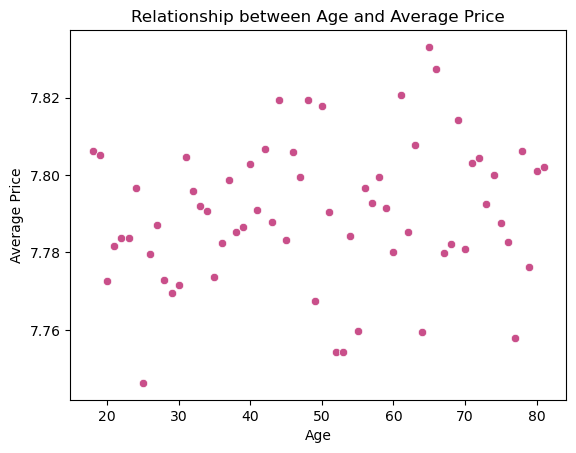

In [53]:
# Create scatter plot for average order expense per age
age_price_scatter = sns. scatterplot(x = 'Age', y = 'prices', data = age_price_avg, color = '#c94f8a')
# Set axis labels and title
age_price_scatter.set_xlabel('Age')
age_price_scatter.set_ylabel('Average Price')
age_price_scatter.set_title('Relationship between Age and Average Price')
# Save Sactter Plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_price_scatter.png'))
# Display the plot
plt.show()

### (9) Create scatter plot for average prices per income.

In [54]:
# Create table for average prices per income
income_price_avg = df_ords_prods_all.groupby('income')['prices'].mean().reset_index()

In [55]:
# View table
income_price_avg.head()

,income,prices
0,25903,3.375000
1,25911,6.675000
2,25937,6.982051
3,25941,5.677419
4,25955,6.907143


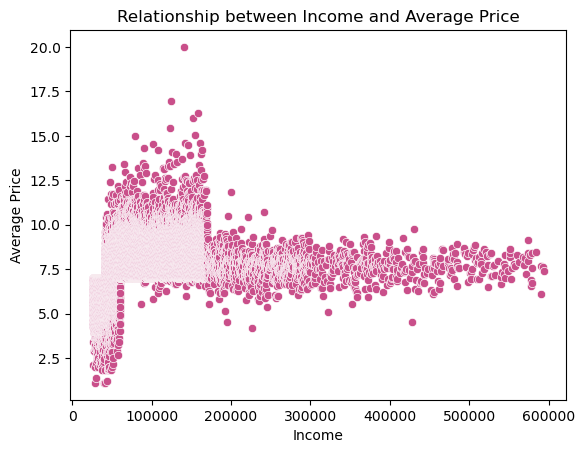

In [56]:
# Create scatter plot for average prices per income
income_price_scatter = sns. scatterplot(x = 'income', y = 'prices', data = income_price_avg, color = '#c94f8a')
# Set axis labels and title
income_price_scatter.set_xlabel('Income')
income_price_scatter.set_ylabel('Average Price')
income_price_scatter.set_title('Relationship between Income and Average Price')
# Save Scatter Plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_price_scatter.png'))
# Display the plot
plt.show()

### (10) Create stacked line chart for order number by department for gender.

In [57]:
# Create table for order number by department for gender
gen_dep_group = df_ords_prods_all.groupby(['department_id', 'Gender']).size().unstack()

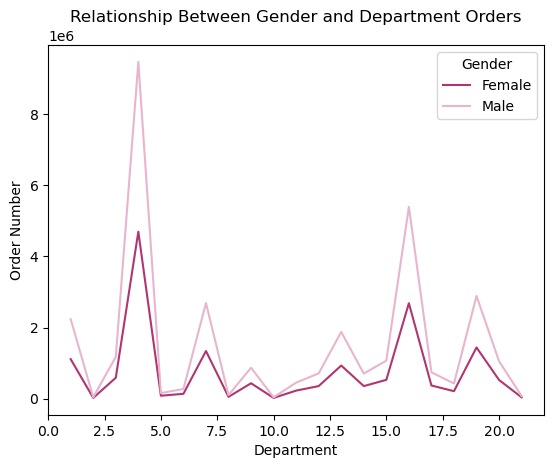

In [58]:
# Create stacked line chart for order number by department for gender
gen_dep_group.scatter = gen_dep_group.plot(kind = 'line', stacked = True, color = ['#b03671', '#e8b5ce'])
# Set axis labels and title
plt.xlabel('Department')
plt.ylabel('Order Number')
plt.title('Relationship Between Gender and Department Orders')
# Set title legend
plt.legend(title = 'Gender')
# Save Stacked Line Chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'gen_dep_line.png'))